In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Analisi dataset TRAINING

In [36]:
# Caricamento dataset training

train_path_X = "Dataset\Train\X_train.csv"
train_path_Y = "Dataset\Train\Y_train.csv"

df_x = pd.read_csv(train_path_X)
df_y = pd.read_csv(train_path_Y)

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
C:\Users\lucab\AppData\Local\Temp\ipykernel_11660\2475431802.py:3: SyntaxWarning: invalid escape sequence '\T'
  train_path_X = "Dataset\Train\X_train.csv"
C:\Users\lucab\AppData\Local\Temp\ipykernel_11660\2475431802.py:4: SyntaxWarning: invalid escape sequence '\T'
  train_path_Y = "Dataset\Train\Y_train.csv"


In [37]:
print(f"Lunghezza df_x: {len(df_x)}")
df_x.head()

Lunghezza df_x: 742625


,id,trq_measured,oat,mgt,pa,ias,np,ng
0,0,54.100,2.00000,544.5000,212.1408,74.56250,89.18000,99.6400
1,1,49.625,24.22231,578.4844,1625.6400,30.35596,99.55273,91.3866
2,2,52.000,7.00000,566.1000,1912.9250,65.62500,100.14000,90.9600
3,3,62.400,7.25000,560.1000,277.0632,54.81250,90.64000,100.2800
4,4,62.900,23.25000,593.7000,53.6448,73.43750,99.91000,92.1700


In [38]:
print(f"Lunghezza df_y: {len(df_y)}")
df_y.head()

Lunghezza df_y: 742625


,id,faulty,trq_margin
0,0,1,-13.717745
1,1,0,1.791863
2,2,1,-13.944871
3,3,0,-0.017281
4,4,0,7.322404


In [39]:
df = pd.concat([df_x, df_y], axis=1)
df = df.drop(columns=[col for col in df.columns if col == 'id'])
print(f"Lunghezza df: {len(df)}")
df.head()

Lunghezza df: 742625


,trq_measured,oat,mgt,pa,ias,np,ng,faulty,trq_margin
0,54.100,2.00000,544.5000,212.1408,74.56250,89.18000,99.6400,1,-13.717745
1,49.625,24.22231,578.4844,1625.6400,30.35596,99.55273,91.3866,0,1.791863
2,52.000,7.00000,566.1000,1912.9250,65.62500,100.14000,90.9600,1,-13.944871
3,62.400,7.25000,560.1000,277.0632,54.81250,90.64000,100.2800,0,-0.017281
4,62.900,23.25000,593.7000,53.6448,73.43750,99.91000,92.1700,0,7.322404


In [40]:
df.describe()

,trq_measured,oat,mgt,pa,ias,np,ng,faulty,trq_margin
count,742625.000000,742625.000000,742625.000000,742625.000000,742625.000000,742625.000000,742625.000000,742625.000000,742625.000000
mean,65.097549,12.675167,592.246116,511.776065,79.324591,97.377919,95.517281,0.403189,-1.157346
std,13.253672,8.066084,39.654582,563.190555,35.395075,3.996721,3.635084,0.490538,14.068843
min,14.673340,-19.250000,467.300000,-208.389200,0.000000,85.010000,90.001830,0.000000,-74.747111
25%,56.100000,7.500000,562.400000,135.331200,51.125000,95.330000,92.226440,0.000000,-6.604321
50%,65.700000,13.703440,589.400000,340.461600,88.375000,99.759770,94.810000,0.000000,1.693847
75%,75.500000,18.500000,622.300000,588.264000,110.562500,100.020000,99.900000,1.000000,7.785348
max,104.730500,36.799130,723.400000,3097.510000,137.562500,101.560000,101.220000,1.000000,34.148857


In [41]:
# 0 = nominal, 1 = faulty
faulty_counts = df['faulty'].value_counts()

# Mostra il risultato
print(f"FAULTY: {faulty_counts[1]}   FREE-FAULT: {faulty_counts[0]}")


FAULTY: 299418   FREE-FAULT: 443207


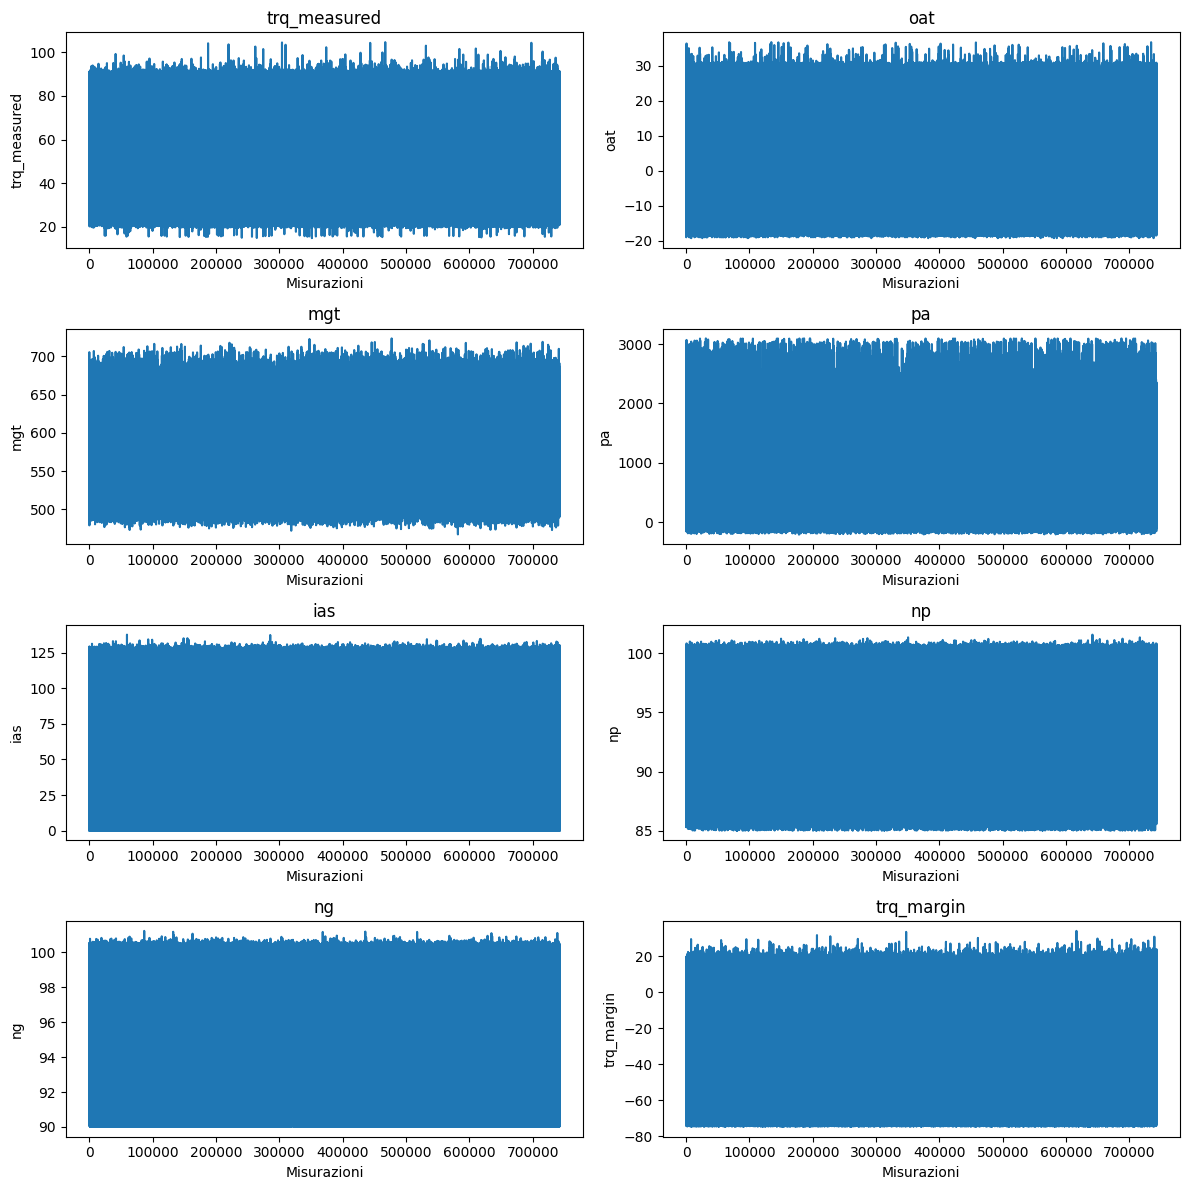

In [42]:
import matplotlib.pyplot as plt

# Elenco delle colonne da graficare (escludendo 'faulty')
columns_to_plot = ['trq_measured', 'oat', 'mgt', 'pa', 'ias', 'np', 'ng', 'trq_margin']

# Creazione di un grafico per ciascuna colonna
fig, axes = plt.subplots(4, 2, figsize=(12, 12))  # Griglia di 4 righe e 2 colonne
axes = axes.flatten()  # Per semplificare l'indicizzazione

for i, col in enumerate(columns_to_plot):
    axes[i].plot(df[col])
    axes[i].set_title(col)
    axes[i].set_xlabel('Misurazioni')
    axes[i].set_ylabel(col)
    
plt.tight_layout()  # Per evitare sovrapposizioni tra i grafici
plt.show()


Dalla matrice di correlazione, si può notare come:

-   **MATRICE DI CORRELAZIONE FAULTY + FAULT-FREE:** 
    
    -   **La correlazione del 64% tra mgt (Measured Gas Temperature) e trq_measured (Torque Measured)** 
    indica una relazione positiva moderata tra la temperatura dei gas di scarico e la coppia misurata. In generale, un aumento della coppia richiede un incremento della produzione di energia, il che comporta un aumento della combustione e, di conseguenza, una maggiore temperatura nei gas di scarico. Tuttavia, la correlazione non è pari a 1, il che significa che l'aumento della coppia non porta a un aumento proporzionale della temperatura dei gas di scarico. Questo accade perché il sistema è progettato per mantenere la temperatura dei gas all'interno di un range sicuro. Infatti, se la temperatura dei gas di scarico continuasse ad aumentare all'aumentare della coppia, ciò potrebbe danneggiare i componenti del motore o compromettere le prestazioni del veicolo. Per questo motivo, il condotto del gas di scarico e il sistema di gestione del motore sono progettati in modo tale da limitare l'incremento della temperatura oltre una certa soglia, evitando danni al sistema. *Tale corellazione è presente anche nelle matrici di correlazione FAULTY e FAULT-FREE*.

    
    -   **ng(Gas generator speed) e np(Power turbine speed) correlate al -79%**
        La correlazione negativa tra *ng* e *np* è probabilmente dovuta alla dinamica di come le due turbinas lavorano insieme per mantenere un equilibrio tra potenza e carico, e un aumento della velocità di uno potrebbe comportare la necessità di ridurre la velocità dell'altro per evitare sovraccarichi o inefficienze.

-   **MATRICE DI CORRELAZIONE FAULTY:**

    -   **oat(Outside Air Temperature) e np(Power Turbine Speed) correlate al 63 %**
        In caso di guasto, il motore a reazione non riuscirà più a compensare variazioni di temperatura, ciò significa che all'aumentare/diminuire della temperatura auenterà/diminuirà la coppia del motore del veivolo.

    -   **ng(Gas Generator Speed) e oat(Outside Air Temperature) correlate al -66%**
        Con temperature più alte, la velocità del generatore di gas diminuisce.
        Spiegando con un esempio, all'aumentare della temperatura, aumenta la potenza della turbina, si dovrebbe dunque produrre piu energia, ma siccome è presente un guasto, allora l'energia prodotta è minore e di conseguenza anche la velocità dei gas di scarico diminuisce. 

    -   **ias(Indicated Airspeed) e oat(Outside Air temperature) correlati al -42%**
        Questa correlazione è spiegabile intersecando i ragionamenti precedenti. In caso di guasto, un aumento della temperatura, comporta una riduzione di energia ed ng, quindi, la velocità del veivolo diminuisce.

-   **MATRICE DI CORRELAZIONE FAULT-FREE:**

    E' interessante notare, come *ias*, *np* ed *ng* Non siano correlate con *oat*, a differenza di quanto accade nella matrice di correlazione FAULTY.

**Idea**: Andando a clusterizzare i datafram con guasti, si potrebbe anche individuare le classi di guasto

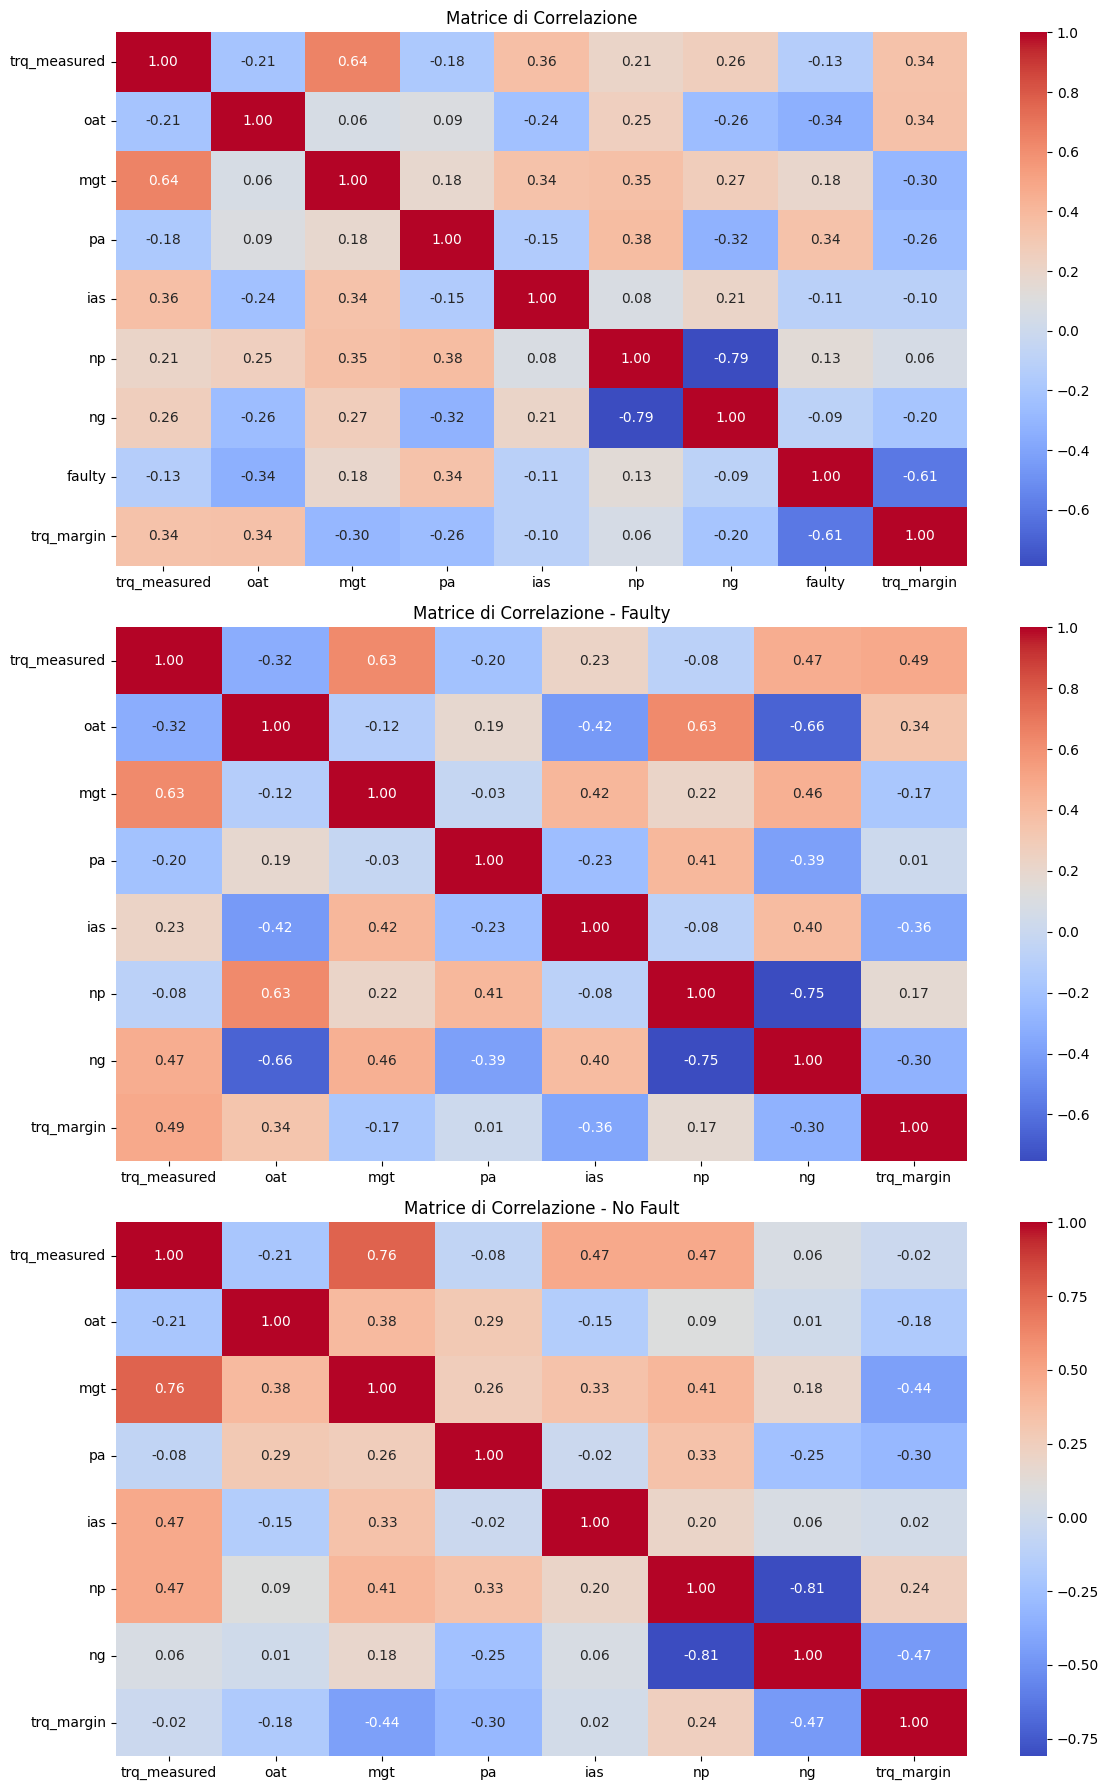

In [43]:
df_fault = df[df['faulty'] == 1].drop(columns=['faulty'])
df_no_fault = df[df['faulty'] == 0].drop(columns=['faulty'])

corr_fault = df_fault.corr()
corr_no_fault = df_no_fault.corr()
correlation_matrix = df.corr()

# Visualizziamo le matrici di correlazione
plt.figure(figsize=(12, 18))  # Aumenta l'altezza per adattare meglio le matrici

# Matrice di correlazione per i campioni con e senza guasto
plt.subplot(3, 1, 1)  # Prima matrice (correlazione totale)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matrice di Correlazione')

# Matrice di correlazione per i campioni con guasto
plt.subplot(3, 1, 2)  # Seconda matrice (correlazione con guasto)
sns.heatmap(corr_fault, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matrice di Correlazione - Faulty')

# Matrice di correlazione per i campioni senza guasto
plt.subplot(3, 1, 3)  # Terza matrice (correlazione senza guasto)
sns.heatmap(corr_no_fault, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matrice di Correlazione - No Fault')

# Mostriamo il grafico
plt.tight_layout()
plt.show()
